<a href="https://colab.research.google.com/github/scanov/rnayabi-g5/blob/main/trabajo1punto1_RNyAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actualizar la versión de scipy de colab

In [1]:
!pip install scipy==1.12.0

In [2]:
import scipy
scipy.__version__

'1.12.0'

Debe decir 1.12.0, en otro caso reiniciar la sesión

Importamos el resto de modulos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
!pip install pygad

In [5]:
import pygad

In [6]:
!pip install -U pymoo

In [7]:
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems.single import Rastrigin
from pymoo.optimize import minimize as mooMinimize
from pymoo.problems.functional import FunctionalProblem

In [8]:
from scipy.optimize import minimize, differential_evolution

In [9]:
import pandas as pd

## Función de schwefel

https://www.sfu.ca/~ssurjano/schwef.html

In [10]:
def schwefel_f(x):
  d = x.shape[0]
  return 418.9829*d - np.sum(x*np.sin(np.sqrt(np.absolute(x))))

In [11]:
ncols = 1000
nrows = 1000
X = np.linspace(-500, 500, ncols)
Y = np.linspace(-500, 500, nrows)
X, Y = np.meshgrid(X, Y)

Z = [schwefel_f(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

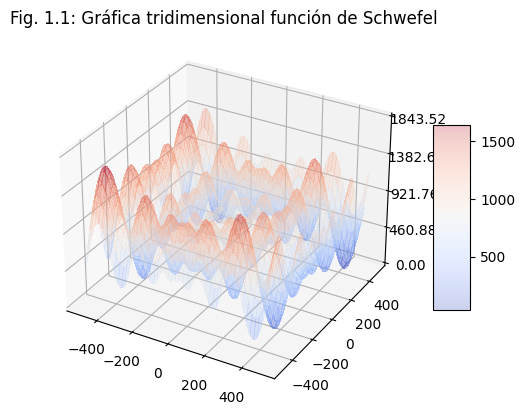

In [12]:
fig1a, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.title("Fig. 1.1: Gráfica tridimensional función de Schwefel")

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.25)


ax.set_zlim(Z.min()*1.1, Z.max()*1.1)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.02f}')
fig1a.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

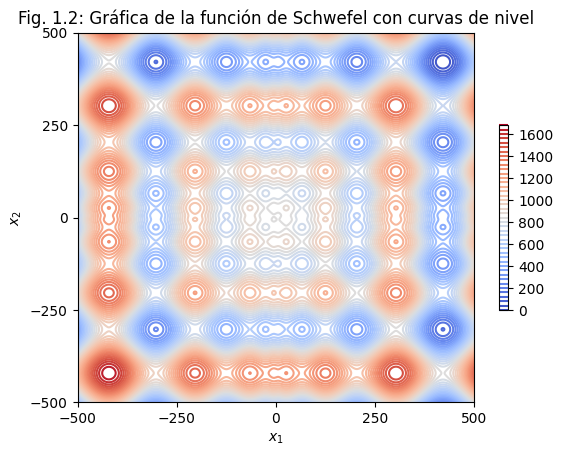

In [37]:
fig1b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig1b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [14]:
ncols = 400
nrows = 400
Xr = np.linspace(300, 500, ncols)
Yr = np.linspace(300, 500, nrows)
Xr, Yr = np.meshgrid(Xr, Yr)

Zr = [schwefel_f(np.array([Xr[i,j], Yr[i,j]])) for i in range(nrows) for j in range(ncols)]
Zr = np.array(Zr).reshape([nrows,ncols])

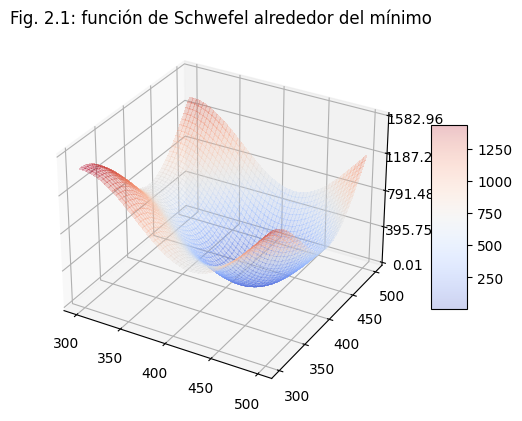

In [15]:
fig2a, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.title("Fig. 2.1: función de Schwefel alrededor del mínimo")

surf = ax.plot_surface(Xr, Yr, Zr, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.25)


ax.set_zlim(Zr.min()*1.1, Zr.max()*1.1)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.02f}')
fig2a.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

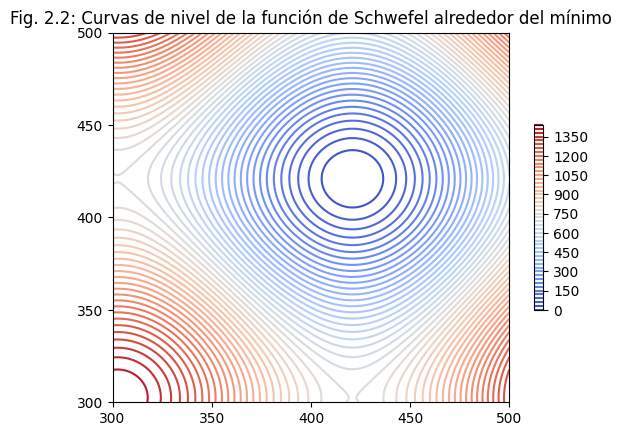

In [24]:
fig2b, bx = plt.subplots()
contorno = bx.contour(Xr,Yr,Zr, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 2.2: Curvas de nivel de la función de Schwefel alrededor del mínimo")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig2b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.show()

#### Descenso por el gradiente

In [17]:
def callback(intermediate_result):
  history.append(np.double(intermediate_result.x))

##### 2 dimensiones

In [18]:
history = []

x0 = np.random.uniform(low=-500, high=500, size=2)

schSolution2D = minimize(schwefel_f, x0, callback=callback)

In [19]:
history

[array([168.16558128, 406.4060189 ]),
 array([172.61381746, 413.32127314]),
 array([186.69335071, 417.99281296]),
 array([213.51854724, 422.00588801]),
 array([203.34312334, 420.88896634]),
 array([203.81823901, 420.9643179 ]),
 array([203.81438066, 420.96796607]),
 array([203.81423915, 420.96876341])]

In [20]:
schSolution2D

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 217.13969484576535
        x: [ 2.038e+02  4.210e+02]
      nit: 8
      jac: [-7.629e-06  0.000e+00]
 hess_inv: [[ 3.806e+00 -1.231e-01]
            [-1.231e-01  3.852e+00]]
     nfev: 36
     njev: 12

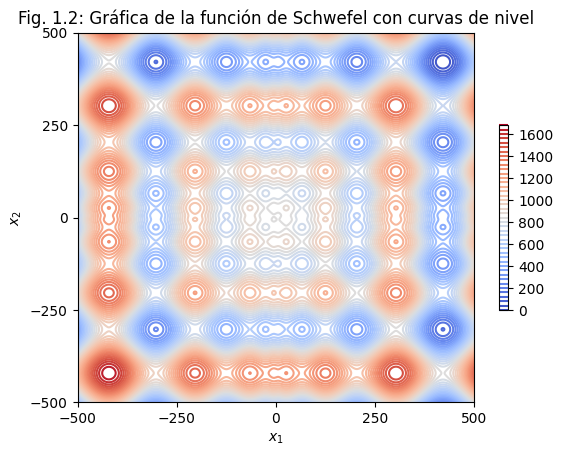

In [38]:
fig1b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig1b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [39]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):
    ax
    Pob = history[i]
    scatter.set_data(Pob[0],Pob[1])
    return (scatter,)

anim = animation.FuncAnimation(fig1b, animate,
                               frames=len(history), interval=len(history)*100, blit=False)
HTML(anim.to_html5_video())

<ipython-input-39-6d0e74ad161e>:8: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(Pob[0],Pob[1])


##### 3 dimensiones

In [32]:
history = []

x0 = np.random.uniform(low=-500, high=500, size=3)

schSolution3D = minimize(schwefel_f, x0, callback=callback)

In [33]:
history

[array([-233.55372743,  430.01856197, -318.61834095]),
 array([-237.12271066,  420.77688561, -312.18370736]),
 array([-303.70052344,  398.91329585, -274.67740622]),
 array([-286.8197283 ,  416.57584213, -292.06779831]),
 array([-299.32810189,  425.76762428, -295.94374666]),
 array([-301.42001761,  424.66820526, -297.69647567]),
 array([-302.95914245,  421.3954812 , -302.35790341]),
 array([-302.59752963,  420.99293916, -302.51881579]),
 array([-302.525323  ,  420.96898362, -302.52631124]),
 array([-302.5249791 ,  420.96861029, -302.52487207]),
 array([-302.52497665,  420.96872891, -302.52489976]),
 array([-302.52491511,  420.96875909, -302.52490699])]

In [ ]:
ncols = 1000
nrows = 1000
X = np.linspace(-500, 500, ncols)
Y = np.linspace(-500, 500, nrows)
X, Y = np.meshgrid(X, Y)

Z = [schwefel_f(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

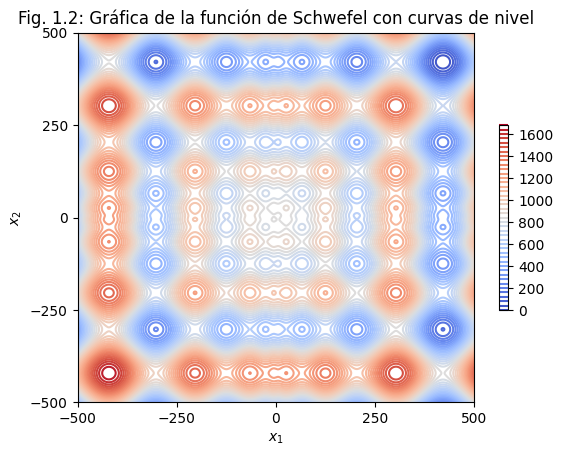

In [41]:
fig3a, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig3a.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [42]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):
    ax
    Pob = history[i]
    scatter.set_data(Pob[0],Pob[1])
    return (scatter,)

anim = animation.FuncAnimation(fig3a, animate,
                               frames=len(history), interval=len(history)*100, blit=False)
HTML(anim.to_html5_video())

<ipython-input-42-94428d1f2e6b>:8: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(Pob[0],Pob[1])


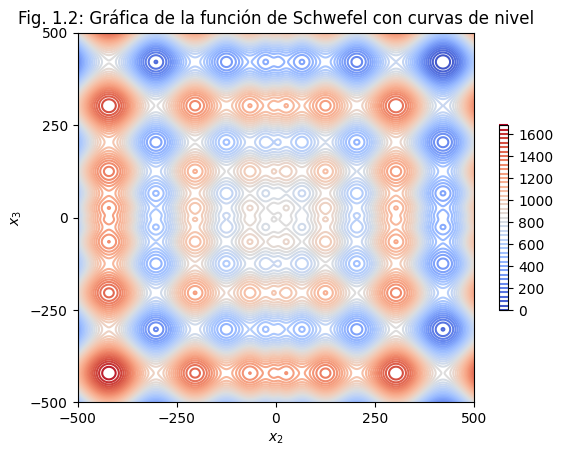

In [43]:
fig3b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig3b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_2$')
plt.ylabel('$x_3$')
plt.show()

In [44]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):
    ax
    Pob = history[i]
    scatter.set_data(Pob[1],Pob[2])
    return (scatter,)

anim = animation.FuncAnimation(fig3b, animate,
                               frames=len(history), interval=len(history)*100, blit=False)
HTML(anim.to_html5_video())

<ipython-input-44-ba21c2499a1c>:8: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(Pob[1],Pob[2])


#### Algoritmo evolutivo

In [46]:
def schwefel_fitness(ga_instance, solution, solution_idx):
  return -schwefel_f(solution)

In [47]:
fitness_function = schwefel_fitness

num_generations = 50
num_parents_mating = 2

sol_per_pop = 10

init_range_low = -500
init_range_high = 500

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

##### 2 dimensiones

In [48]:
num_genes = 2

In [49]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -500, 'high': 500},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

In [50]:
ga_instance.run()

In [51]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución : {solution}".format(solution=solution))
print("Valor de la función objetivo = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Posición de la mejor solución = {solution_idx}".format(solution_idx=solution_idx))

Mejor solución : [420.93136926 422.80376169]
Valor de la función objetivo = -0.42532529893264837
Posición de la mejor solución = 0


Text(0, 0.5, '$x_2$')

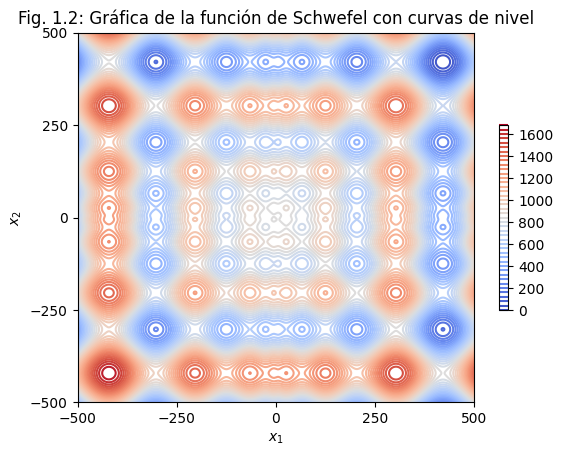

In [55]:
fig1b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig1b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [54]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):
    Pob = np.array(ga_instance.solutions[i*sol_per_pop:(i+1)*sol_per_pop])
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

anim = animation.FuncAnimation(fig1b, animate, init_func=init,
                               frames=50, interval=500, blit=True)
HTML(anim.to_html5_video())

##### 3 dimensiones

In [56]:
num_genes = 3

In [57]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -500, 'high': 500},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

In [58]:
ga_instance.run()

In [59]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución : {solution}".format(solution=solution))
print("Valor de la función objetivo = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Posición de la mejor solución = {solution_idx}".format(solution_idx=solution_idx))

Mejor solución : [430.27254743 426.37697269 431.07760245]
Valor de la función objetivo = -27.48634048304507
Posición de la mejor solución = 0


Text(0, 0.5, '$x_2$')

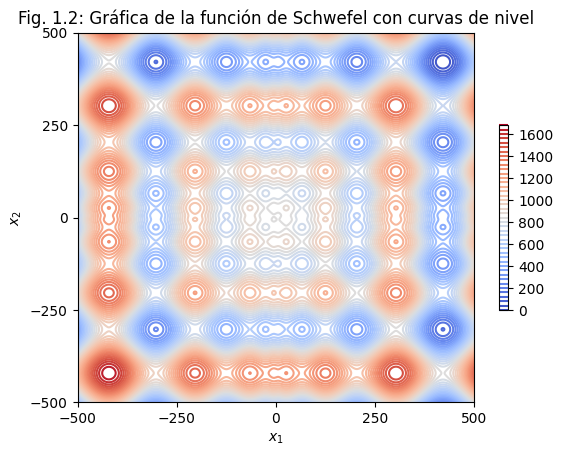

In [64]:
fig3a, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig3a.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [65]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):
    Pob = np.array(ga_instance.solutions[i*sol_per_pop:(i+1)*sol_per_pop])
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

anim = animation.FuncAnimation(fig3a, animate, init_func=init,
                               frames=50, interval=500, blit=True)
HTML(anim.to_html5_video())

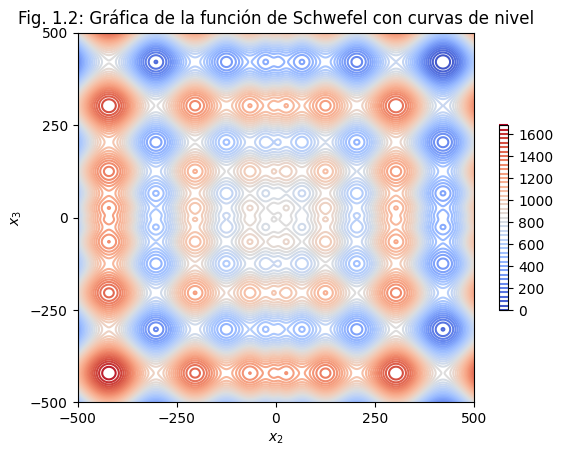

In [68]:
fig3b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig3b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_2$')
plt.ylabel('$x_3$')
plt.show()

In [69]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):
    Pob = np.array(ga_instance.solutions[i*sol_per_pop:(i+1)*sol_per_pop])
    scatter.set_data(Pob[:,1],Pob[:,2])
    return (scatter,)

anim = animation.FuncAnimation(fig3b, animate, init_func=init,
                               frames=50, interval=500, blit=True)
HTML(anim.to_html5_video())

#### Evolución diferencial

In [70]:
def callback(intermediate_result):
  history.append(np.double(intermediate_result.population))

##### 2 dimensiones

In [71]:
bounds = [(-500, 500)] * 2
history = []
de = differential_evolution(schwefel_f, bounds=bounds, callback=callback)

In [72]:
de

             message: Optimization terminated successfully.
             success: True
                 fun: 2.545640154494322e-05
                   x: [ 4.210e+02  4.210e+02]
                 nit: 30
                nfev: 936
          population: [[ 4.210e+02  4.210e+02]
                       [ 4.210e+02  4.210e+02]
                       ...
                       [ 4.210e+02  4.210e+02]
                       [ 4.210e+02  4.210e+02]]
 population_energies: [ 2.546e-05  2.566e-05 ...  2.548e-05  2.549e-05]
                 jac: [-1.137e-05  2.274e-05]

Text(0, 0.5, '$x_2$')

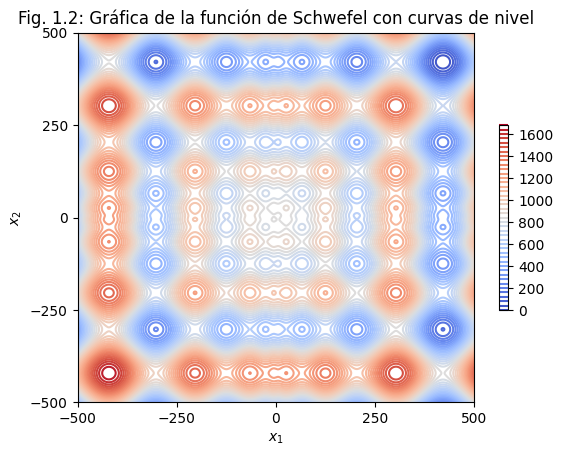

In [73]:
fig1b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig1b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [74]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):

    Pob = history[i]
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

anim = animation.FuncAnimation(fig1b, animate,
                               frames=len(history), interval=len(history)*100, blit=False)
HTML(anim.to_html5_video())

##### 3 dimensiones

In [82]:
bounds = [(-500, 500)] * 3
history = []
de = differential_evolution(schwefel_f, bounds=bounds, callback=callback)

In [83]:
de

             message: Optimization terminated successfully.
             success: True
                 fun: 118.43837279841546
                   x: [ 4.210e+02 -3.025e+02  4.210e+02]
                 nit: 25
                nfev: 1186
          population: [[ 4.206e+02 -3.020e+02  4.213e+02]
                       [ 4.237e+02 -2.991e+02  4.183e+02]
                       ...
                       [ 4.201e+02 -3.019e+02  4.212e+02]
                       [ 4.197e+02 -3.005e+02  4.204e+02]]
 population_energies: [ 1.184e+02  1.218e+02 ...  1.186e+02  1.192e+02]
                 jac: [ 0.000e+00  2.274e-05  0.000e+00]

Text(0, 0.5, '$x_2$')

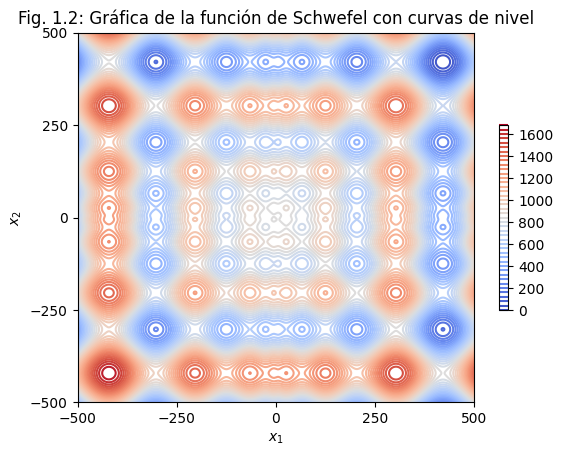

In [84]:
fig3a, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig3a.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [85]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):

    Pob = history[i]
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

anim = animation.FuncAnimation(fig3a, animate,
                               frames=len(history), interval=len(history)*100, blit=False)
HTML(anim.to_html5_video())

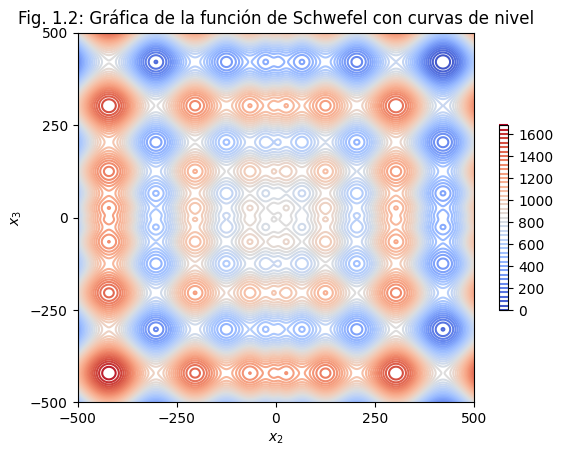

In [86]:
fig3b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig3b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_2$')
plt.ylabel('$x_3$')
plt.show()

In [87]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):

    Pob = history[i]
    scatter.set_data(Pob[:,1],Pob[:,2])
    return (scatter,)

anim = animation.FuncAnimation(fig3b, animate,
                               frames=len(history), interval=len(history)*100, blit=False)
HTML(anim.to_html5_video())

#### Enjambre de partículas

In [90]:
def swarm(f, d, lower, upper):
  problem = FunctionalProblem(n_var=d,
                            objs=f,
                            xl=np.array([lower]*d),
                            xu=np.array([upper]*d)
                            )

  algorithm = PSO()

  res = mooMinimize(problem,
               algorithm,
               verbose=False,
               save_history=True)

  return res

##### 2 dimensiones

In [91]:
res = swarm(schwefel_f, 2, -500, 500)
print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

Best solution found: 
X = [ 420.96875458 -302.52493113]
F = [118.43836007]


In [92]:
history = [sol.pop.get('X') for sol in res.history]

Text(0, 0.5, '$x_2$')

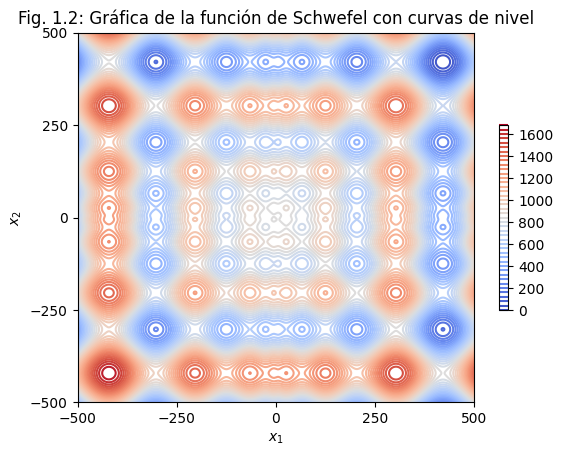

In [88]:
fig1b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig1b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [93]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):

    Pob = history[i]
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

anim = animation.FuncAnimation(fig1b, animate,
                               frames=len(history), interval=1000, blit=False)
HTML(anim.to_html5_video())

##### 3 dimensiones

In [95]:
res = swarm(schwefel_f, 3, -500, 500)
print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

Best solution found: 
X = [ 420.96885923  420.96878614 -124.8294949 ]
F = [296.10675195]


In [96]:
history = [sol.pop.get('X') for sol in res.history]

Text(0, 0.5, '$x_2$')

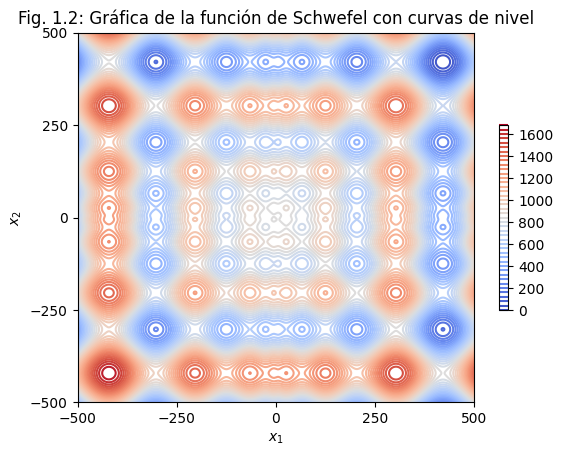

In [99]:
fig3a, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig3a.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [100]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):

    Pob = history[i]
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

anim = animation.FuncAnimation(fig3a, animate,
                               frames=len(history), interval=1000, blit=False)
HTML(anim.to_html5_video())

In [ ]:
fig3b, bx = plt.subplots()
contorno = bx.contour(X,Y,Z, levels = 50, cmap=cm.coolwarm)
plt.title("Fig. 1.2: Gráfica de la función de Schwefel con curvas de nivel")
# Add a color bar which maps values to colors.
bx.yaxis.set_major_locator(LinearLocator(5))
bx.xaxis.set_major_locator(LinearLocator(5))
fig3b.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = bx.plot([], [], '*')
plt.xlabel('$x_2$')
plt.ylabel('$x_3$')

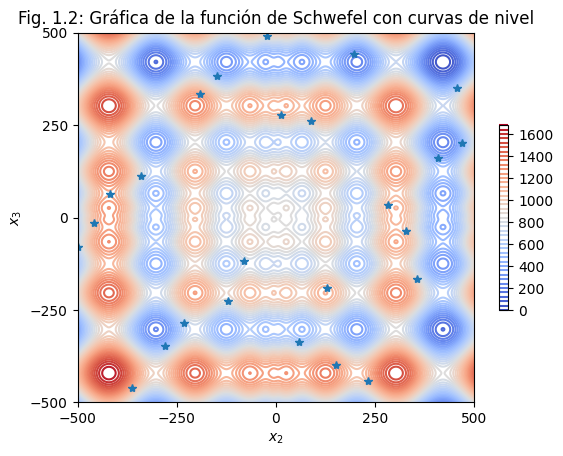

In [98]:
def init():
    scatter.set_data([], [])
    return (scatter,)

def animate(i):

    Pob = history[i]
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

anim = animation.FuncAnimation(fig3b, animate,
                               frames=len(history), interval=1000, blit=False)
HTML(anim.to_html5_video())

### analisis

In [193]:
results = []

In [194]:
f_history = []
time = []
for i in range(50):
  bounds = [(-500, 500)] * 3
  x0 = np.random.uniform(low=-500, high=500, size=3)
  start = timer()
  res = minimize(fun=schwefel_f, x0=x0, method='BFGS', bounds=bounds)
  end = timer()
  f_history.append(res.fun)
  time.append(end-start)

f_history = np.array(f_history)

<ipython-input-194-0665ab3585a7>:7: RuntimeWarning: Method BFGS cannot handle bounds.
  res = minimize(fun=schwefel_f, x0=x0, method='BFGS', bounds=bounds)
<ipython-input-194-0665ab3585a7>:7: RuntimeWarning: Method BFGS cannot handle bounds.
  res = minimize(fun=schwefel_f, x0=x0, method='BFGS', bounds=bounds)


In [195]:
results.append([np.mean(f_history),np.max(f_history), np.min(f_history), np.mean(f_history < 1),np.mean(time)])

In [196]:
f_history = []
time = []
for i in range(50):
  start = timer()
  ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=3,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -500, 'high': 500},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

  ga_instance.run()
  solution, solution_fitness, solution_idx = ga_instance.best_solution()

  end = timer()
  f_history.append(-solution_fitness)
  time.append(end-start)

f_history = np.array(f_history)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

In [197]:
results.append([np.mean(f_history),np.max(f_history), np.min(f_history), np.mean(f_history < 1),np.mean(time)])

In [198]:
f_history = []
time = []
for i in range(50):
  bounds = [(-500, 500)] * 3
  start = timer()
  res = differential_evolution(schwefel_f, bounds=bounds)
  end = timer()
  f_history.append(res.fun)
  time.append(end-start)

f_history = np.array(f_history)

In [199]:
results.append([np.mean(f_history),np.max(f_history), np.min(f_history), np.mean(f_history < 1),np.mean(time)])

In [200]:
f_history = []
time = []
for i in range(50):
  start = timer()
  res = swarm(schwefel_f, 3, -500, 500)
  end = timer()
  f_history.append(res.F)
  time.append(end-start)

f_history = np.array(f_history)

In [201]:
results.append([np.mean(f_history),np.max(f_history), np.min(f_history), np.mean(f_history < 1),np.mean(time)])

In [202]:
results_df = pd.DataFrame(data=results, index=['gradiente','evolutivo','diferencial','particulas'],columns=['media','máximo','mínimo','% convergencias','tiempo promedio'])

In [203]:
results_df

media      máximo      mínimo  % convergencias  \
gradiente    413.011046  987.525199 -276.352782             0.02   
evolutivo     15.406356  148.336669    0.129998             0.04   
diferencial   11.843872  118.438373    0.000038             0.90   
particulas   147.258967  454.016377    0.000038             0.20   

             tiempo promedio  
gradiente           0.070268  
evolutivo           0.248186  
diferencial         0.913799  
particulas          1.730287

In [204]:
results

[[413.01104639758415,
  987.5251985414111,
  -276.3527816897722,
  0.02,
  0.07026752254012536],
 [15.406356277283553,
  148.33666930147524,
  0.12999763915877338,
  0.04,
  0.24818595080010708],
 [11.843871645160762,
  118.4383727984191,
  3.818271898126113e-05,
  0.9,
  0.9137986901401746],
 [147.25896653223637,
  454.0163768045916,
  3.81834331619757e-05,
  0.2,
  1.7302874029400117]]

## Función de griewank

https://www.sfu.ca/~ssurjano/griewank.html

In [266]:
def griewank_f(x):
  d = x.shape[0]
  x.tolist()
  prod_terms = np.array([np.cos(x_i/np.sqrt(i+1)) for i,x_i in enumerate(x.tolist())])
  return np.sum(x**2)/4000 - np.prod(prod_terms) + 1

In [206]:
ncols = 100
nrows = 100
X = np.linspace(-100, 100, ncols)
Y = np.linspace(-100, 100, nrows)
X, Y = np.meshgrid(X, Y)

Z = [griewank_f(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

In [268]:
ncols = 1200
nrows = 1200
X = np.linspace(-600, 600, ncols)
Y = np.linspace(-600, 600, nrows)
X, Y = np.meshgrid(X, Y)

Z = [griewank_f(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

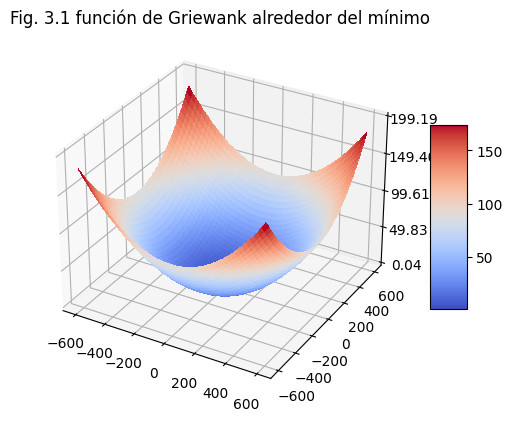

In [274]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.title("Fig. 3.1 función de Griewank")

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z.min()*1.1, Z.max()*1.1)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

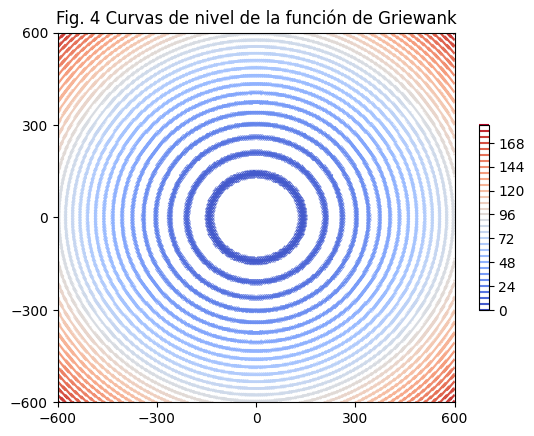

In [273]:
fig4, dx = plt.subplots()
contorno = dx.contour(X,Y,Z, levels = 30, cmap=cm.coolwarm)
plt.title("Fig. 4 Curvas de nivel de la función de Griewank")
# Add a color bar which maps values to colors.
dx.yaxis.set_major_locator(LinearLocator(5))
dx.xaxis.set_major_locator(LinearLocator(5))
fig4.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = dx.plot([], [], '*')
plt.show()

In [275]:
ncols = 200
nrows = 200
X = np.linspace(-100, 100, ncols)
Y = np.linspace(-100, 100, nrows)
X, Y = np.meshgrid(X, Y)

Z = [griewank_f(np.array([X[i,j], Y[i,j]])) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

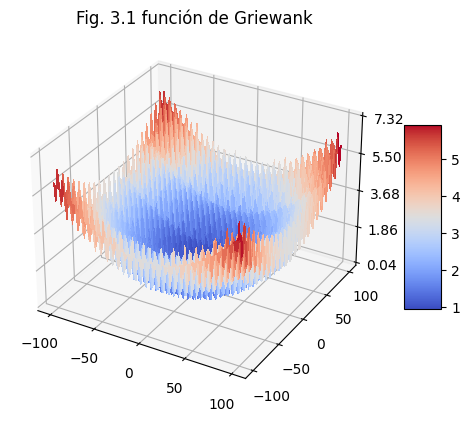

In [276]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.title("Fig. 4.1 función de Griewank alrededor del minimo")

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z.min()*1.1, Z.max()*1.1)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

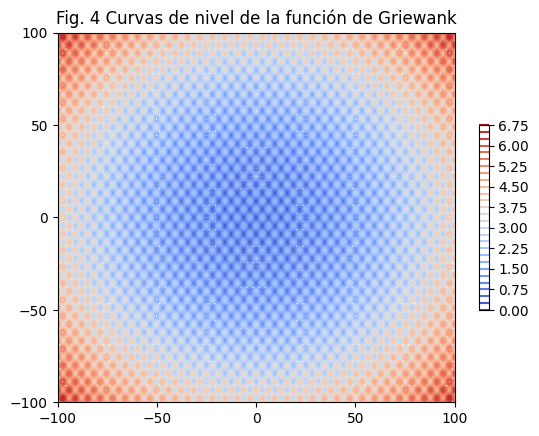

In [277]:
fig4, dx = plt.subplots()
contorno = dx.contour(X,Y,Z, levels = 30, cmap=cm.coolwarm)
plt.title("Fig. 4.2 Curvas de nivel de la función de Griewank alrededor del minimo")
# Add a color bar which maps values to colors.
dx.yaxis.set_major_locator(LinearLocator(5))
dx.xaxis.set_major_locator(LinearLocator(5))
fig4.colorbar(contorno, shrink=0.5, aspect=20)
scatter, = dx.plot([], [], '*')
plt.show()

#### Descenso por el gradiente

In [208]:
def callback(intermediate_result):
  history.append(np.double(intermediate_result.x))

##### 2 dimensiones

In [209]:
history = []

x0 = np.random.uniform(low=-100, high=100, size=2)

griew_solution = minimize(griewank_f, x0, callback=callback)

In [210]:
history

[array([-40.73374583,  39.94464651]),
 array([-40.83211346,  39.94528068]),
 array([-40.82026279,  39.94558506]),
 array([-40.8202821 ,  39.94578591]),
 array([-40.82028491,  39.9459868 ])]

In [211]:
griew_solution

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.8161019364076749
        x: [-4.082e+01  3.995e+01]
      nit: 5
      jac: [-1.118e-07  7.451e-09]
 hess_inv: [[ 9.934e-01 -2.116e-03]
            [-2.116e-03  1.999e+00]]
     nfev: 18
     njev: 6

##### 3 dimensiones

In [212]:
history = []

x0 = np.random.uniform(low=-100, high=100, size=3)

griew_solution = minimize(griewank_f, x0, callback=callback)

In [213]:
griew_solution

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.810136378635149
        x: [-9.734e+01 -9.321e+01  3.260e+01]
      nit: 13
      jac: [ 8.285e-06 -8.941e-07  1.371e-06]
 hess_inv: [[ 1.106e+00 -1.835e-02  1.981e-01]
            [-1.835e-02  2.012e+00 -4.537e-02]
            [ 1.981e-01 -4.537e-02  3.216e+00]]
     nfev: 64
     njev: 16

#### Algoritmo evolutivo

In [214]:
def griewank_fitness(ga_instance, solution, solution_idx):
  return -griewank_f(solution)

In [215]:
fitness_function = griewank_fitness

num_generations = 100
num_parents_mating = 2

sol_per_pop = 10

init_range_low = -100
init_range_high = 100

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

##### 2 dimensiones

In [216]:
num_genes = 2

In [217]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -100, 'high': 100},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

In [218]:
ga_instance.run()

In [219]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución : {solution}".format(solution=solution))
print("Valor de la función objetivo = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Posición de la mejor solución = {solution_idx}".format(solution_idx=solution_idx))

Mejor solución : [ 3.26475563 -4.40112223]
Valor de la función objetivo = -0.015514758867203327
Posición de la mejor solución = 0


##### 3 dimensiones

In [220]:
num_genes = 3

In [221]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -100, 'high': 100},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

In [222]:
ga_instance.run()

In [223]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución : {solution}".format(solution=solution))
print("Valor de la función objetivo = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Posición de la mejor solución = {solution_idx}".format(solution_idx=solution_idx))

Mejor solución : [ -9.46739494 -13.30856922 -10.50395026]
Valor de la función objetivo = -0.11908076772984066
Posición de la mejor solución = 5


#### Evolución diferencial

In [224]:
def callback(intermediate_result):
  history.append(np.double(intermediate_result.population))

##### 2 dimensiones

In [225]:
bounds = [(-100, 100)] * 2
history = []
de = differential_evolution(griewank_f, bounds=bounds, callback=callback)

In [226]:
de

             message: Optimization terminated successfully.
             success: True
                 fun: 0.0
                   x: [ 7.960e-09 -9.147e-09]
                 nit: 78
                nfev: 2373
          population: [[ 7.960e-09 -9.147e-09]
                       [-7.350e-10 -8.119e-09]
                       ...
                       [ 4.683e-09 -2.834e-10]
                       [ 5.372e-09 -1.375e-08]]
 population_energies: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]

In [227]:
history

[array([[ 12.96355157,  16.42783114],
        [  7.077209  , -87.5144422 ],
        [ 28.95073989, -54.97875514],
        [-45.12475482, -60.65945103],
        [-75.11097951, -37.82519356],
        [-46.70015307,   2.70593799],
        [-18.73650201, -83.61282084],
        [ 57.15627016, -52.58133803],
        [  7.56238268, -25.62813997],
        [ 44.61278015,  -1.3018593 ],
        [ 33.60561095,  -5.16119169],
        [ 69.28927993, -71.57631176],
        [ 29.4898607 ,   3.84318597],
        [-36.70399404,  34.14846848],
        [ 41.14611619,  10.94267761],
        [-12.01018177,  21.48354151],
        [ 25.43367668,  64.76352823],
        [-20.55373875,  24.53091784],
        [-61.0988463 ,  40.96766997],
        [ 15.19903642, -17.14719935],
        [ 12.17922313,  89.14197019],
        [ 18.60416924,  61.57129348],
        [ 27.17903216, -26.98783679],
        [ 61.11811637,  17.94525799],
        [  5.23959428, -54.24480658],
        [-16.07391248,  -2.87897663],
        [ 43

##### 3 dimensiones

In [228]:
bounds = [(-100, 100)] * 3
history = []
de = differential_evolution(griewank_f, bounds=bounds, callback=callback)

In [229]:
de

             message: Optimization terminated successfully.
             success: True
                 fun: 0.00739604033775576
                   x: [-3.140e+00 -4.438e+00 -6.357e-07]
                 nit: 84
                nfev: 3845
          population: [[-3.139e+00 -4.439e+00  1.176e-03]
                       [-3.139e+00 -4.437e+00  1.622e-02]
                       ...
                       [-3.137e+00 -4.431e+00 -1.752e-03]
                       [-3.133e+00 -4.435e+00 -5.835e-03]]
 population_energies: [ 7.396e-03  7.441e-03 ...  7.413e-03  7.428e-03]
                 jac: [-2.198e-06  1.077e-06 -2.109e-07]

#### Enjambre de partículas

##### 2 dimensiones

In [230]:
res = swarm(griewank_f, 2, -100, 100)
print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

Best solution found: 
X = [-3.13997064  4.43830827]
F = [0.00739605]


In [231]:
history = [sol.pop.get('X') for sol in res.history]

##### 3 dimensiones

In [232]:
res = swarm(griewank_f, 3, -100, 100)
print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

Best solution found: 
X = [-3.14055732e+00  4.43884248e+00 -8.87833281e-04]
F = [0.00739635]


### análisis

In [235]:
results = []

In [236]:
f_history = []
time = []
for i in range(50):
  bounds = [(-600, 600)] * 3
  x0 = np.random.uniform(low=-600, high=600, size=3)
  start = timer()
  res = minimize(fun=griewank_f, x0=x0, bounds=bounds)
  end = timer()
  f_history.append(res.fun)
  time.append(end-start)

f_history = np.array(f_history)

In [237]:
results.append([np.mean(f_history),np.max(f_history), np.min(f_history), np.mean(f_history < 1),np.mean(time)])

In [238]:
f_history = []
time = []
for i in range(50):
  start = timer()
  ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=3,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -600, 'high': 600},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

  ga_instance.run()
  solution, solution_fitness, solution_idx = ga_instance.best_solution()

  end = timer()
  f_history.append(-solution_fitness)
  time.append(end-start)

f_history = np.array(f_history)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

In [239]:
results.append([np.mean(f_history),np.max(f_history), np.min(f_history), np.mean(f_history < 1),np.mean(time)])

In [240]:
f_history = []
time = []
for i in range(50):
  bounds = [(-600, 600)] * 3
  start = timer()
  res = differential_evolution(griewank_f, bounds=bounds)
  end = timer()
  f_history.append(res.fun)
  time.append(end-start)

f_history = np.array(f_history)

In [241]:
results.append([np.mean(f_history),np.max(f_history), np.min(f_history), np.mean(f_history < 1),np.mean(time)])

In [242]:
f_history = []
time = []
for i in range(50):
  start = timer()
  res = swarm(griewank_f, 3, -600, 600)
  end = timer()
  f_history.append(res.F)
  time.append(end-start)

f_history = np.array(f_history)

In [243]:
results.append([np.mean(f_history),np.max(f_history), np.min(f_history), np.mean(f_history < 1),np.mean(time)])

In [244]:
results_df = pd.DataFrame(data=results, index=['gradiente','evolutivo','diferencial','particulas'],columns=['media','máximo','mínimo','% convergencias','tiempo promedio'])

In [245]:
results_df

media      máximo        mínimo  % convergencias  \
gradiente    54.112133  123.690625  6.431869e-01             0.04   
evolutivo     0.354352    0.865039  4.725557e-02             1.00   
diferencial   0.007690    0.029584  0.000000e+00             1.00   
particulas    0.028920    0.103214  8.304244e-10             1.00   

             tiempo promedio  
gradiente           0.022613  
evolutivo           0.090062  
diferencial         0.908361  
particulas          1.805861

In [246]:
results

[[54.11213272288286,
  123.69062529520833,
  0.6431869418455882,
  0.04,
  0.022613392760031274],
 [0.354352087560424,
  0.8650391149680166,
  0.04725556821006871,
  1.0,
  0.09006199781986651],
 [0.007689814224941987, 0.029584161307020795, 0.0, 1.0, 0.9083614127799956],
 [0.028920162982931416,
  0.10321448587178728,
  8.304243959145197e-10,
  1.0,
  1.805860638019949]]